In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import re

### Inspect training criteria

In [31]:
def get_loss(category):
    with open(f'/home/bule/projects/UTRAD/Exp0-r18-{category}/args.log', 'r') as file:
        lines = file.readlines()[19:]
        lines = [line.strip() for line in lines]
    lines_new=[float(re.findall(r"Loss:(\d+\.\d+)", item)[0]) for item in lines]
    plt.plot(lines_new),plt.title(f'training loss:  {category} '),plt.show()


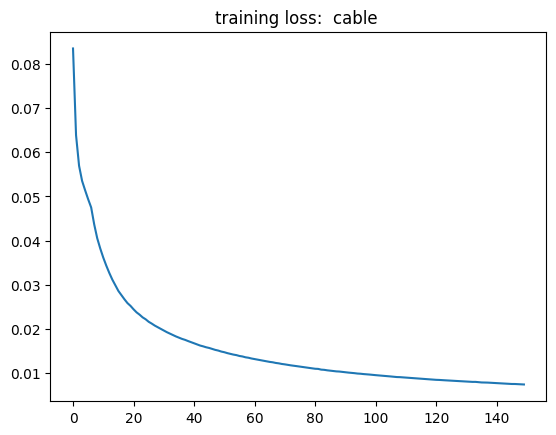

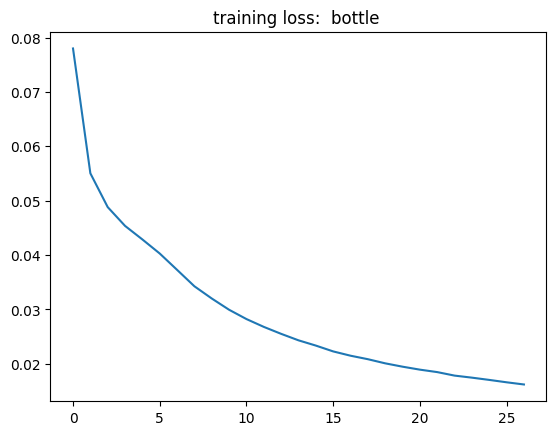

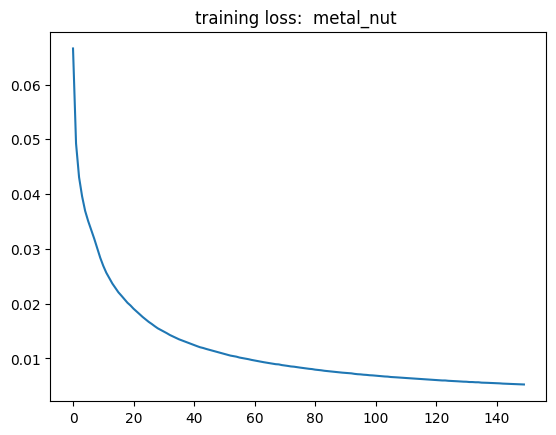

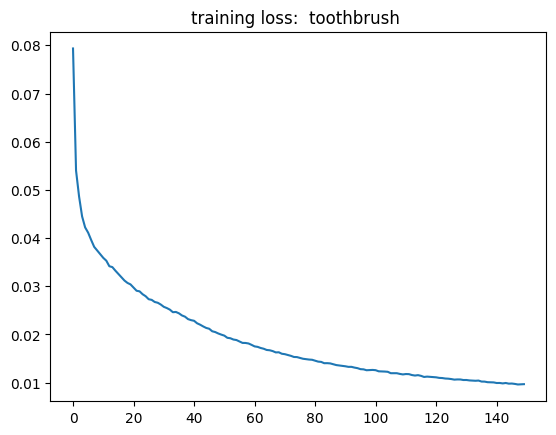

In [34]:
category='cable'
category_list=['cable', 'bottle', 'metal_nut', 'toothbrush']
for category in category_list:
    get_loss(category)